In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction,linear_model,model_selection,preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


READ DATASETS

In [25]:
fake = pd.read_csv('/content/grive/MyDrive/Fake.csv')
true = pd.read_csv('/content/grive/MyDrive/True.csv')

In [26]:
fake.shape

(23481, 4)

In [27]:
true.shape

(21417, 4)

DATA CLEANING AND PREPARATION

In [34]:
# Add flag to track fake and real
fake['target']= 'fake'
true['target']= 'true'

In [35]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [36]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [39]:
#Concatenate dataframes
data = pd.concat([fake,true]).reset_index(drop = True)
data.shape

(44898, 5)

In [40]:
data.head(5)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [41]:
data.tail(5)

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [44]:
#shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)


In [43]:
# Check the data
data.head()

,title,text,subject,date,target
0,A Whopping 0% Of Black Voters In Ohio And Pen...,"That s right, according to the latest NBC News...",News,"July 14, 2016",fake
1,The Plans For The Republican Convention Just ...,The plans for the Republican convention have s...,News,"April 22, 2016",fake
2,DEMOCRAT ALAN DERSHOWITZ Calls Out Court’s Rul...,,Government News,"Mar 20, 2017",fake
3,Austria election victor calls for end to Turke...,BRUSSELS (Reuters) - Austria s likely next cha...,worldnews,"October 19, 2017",true
4,FLORIDA CAR DEALER THREATENED WITH FINES FOR D...,It doesn t get much more anti-American than fo...,left-news,"Jul 2, 2015",fake


In [45]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [46]:
#removing the data
data.drop(["date"],axis=1,inplace=True)
data.head()



,title,text,subject,target
0,WHITE BASEBALL PLAYER LOSES SCHOLARSHIP AFTER ...,So words deemed offensive are only offensive i...,left-news,fake
1,"The World To Trump: F*ck Off, You Did Not ‘In...","With the White House plagued with scandals, Do...",News,fake
2,AS TRUMP’S POPULARITY SOARS ABROAD…Village In ...,President Donald Trump welcomed India s Prime ...,politics,fake
3,Merkel deems migrant deal good for coalition t...,BERLIN (Reuters) - German Chancellor Angela Me...,worldnews,true
4,Mike Huckabee Throws Evangelicals Under A Spe...,Mike Huckabee is fed up with evangelical Chri...,News,fake


In [47]:
#removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,So words deemed offensive are only offensive i...,left-news,fake
1,"With the White House plagued with scandals, Do...",News,fake
2,President Donald Trump welcomed India s Prime ...,politics,fake
3,BERLIN (Reuters) - German Chancellor Angela Me...,worldnews,true
4,Mike Huckabee is fed up with evangelical Chri...,News,fake


In [48]:
#convert to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,so words deemed offensive are only offensive i...,left-news,fake
1,"with the white house plagued with scandals, do...",News,fake
2,president donald trump welcomed india s prime ...,politics,fake
3,berlin (reuters) - german chancellor angela me...,worldnews,true
4,mike huckabee is fed up with evangelical chri...,News,fake


In [55]:
#remove punctuation
import string
def punctuation_removal(text):
  all_list = [char for char in text if char not in string.punctuation]
  clean_str = ''.join(all_list)
  return clean_str

data['text']=data['text'].apply(punctuation_removal)

In [56]:
#check
data.head()

,text,subject,target
0,so words deemed offensive are only offensive i...,left-news,fake
1,with the white house plagued with scandals don...,News,fake
2,president donald trump welcomed india s prime ...,politics,fake
3,berlin reuters german chancellor angela merke...,worldnews,true
4,mike huckabee is fed up with evangelical chri...,News,fake


In [57]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text']=data['text'].apply(lambda x: ' '.join([word for word in x.split()if word not in (stop)]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [58]:
data.head()

,text,subject,target
0,words deemed offensive offensive white racist ...,left-news,fake
1,white house plagued scandals donald trump repe...,News,fake
2,president donald trump welcomed india prime mi...,politics,fake
3,berlin reuters german chancellor angela merkel...,worldnews,true
4,mike huckabee fed evangelical christians threw...,News,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


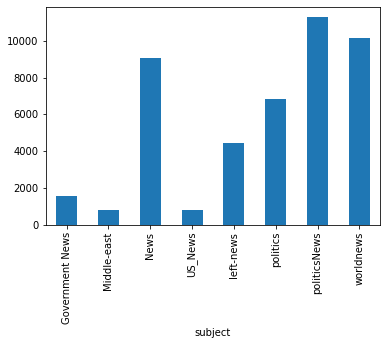

In [60]:
#how many articles per subject
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


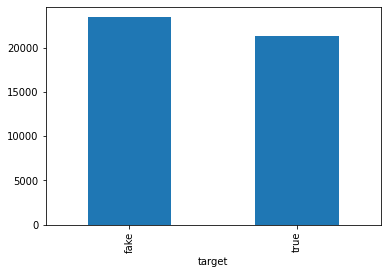

In [61]:
#how many fake and real articles
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()


In [63]:
!pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


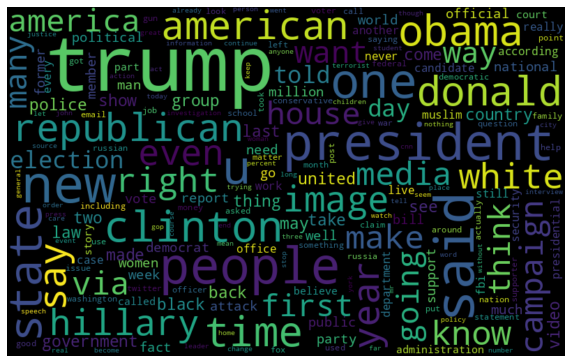

In [65]:
#word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width=800,height=500,max_font_size = 110,collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [66]:
#Most frequent words counter 
from nltk import tokenize

token_space = tokenize. WhitespaceTokenizer()
def counter(text, column_text, quantity):

     all_words=' '.join([text for text in text[column_text]]) 
     token_phrase = token_space.tokenize (all_words) 
     frequency = nltk.FreqDist (token_phrase) 
     df_frequency = pd.DataFrame({"Word": list(frequency.keys()),"Frequency": list(frequency.values())})
     df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
     plt.figure(figsize=(12,8))
     ax = sns.barplot(data = df_frequency, x = "Word", y= "Frequency", color = 'blue')
     ax.set(ylabel = "Count")
     plt.xticks(rotation='vertical')
     plt.show()

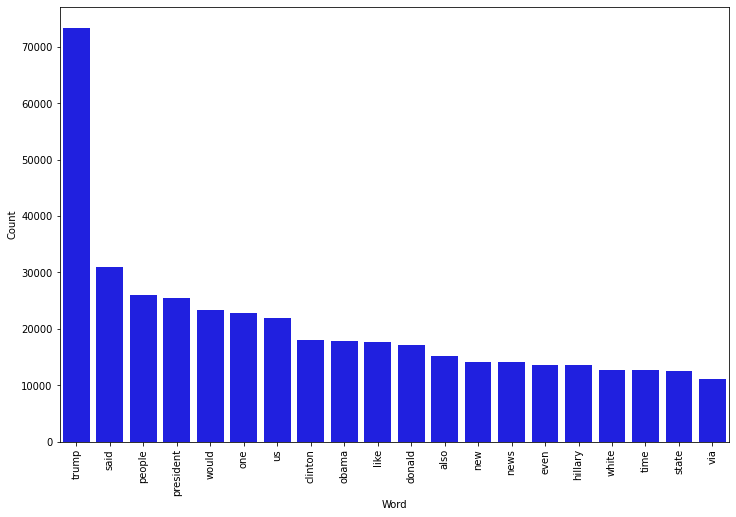

In [67]:
#most frequent words in fake news
counter(data[data["target"]=="fake"],"text",20)

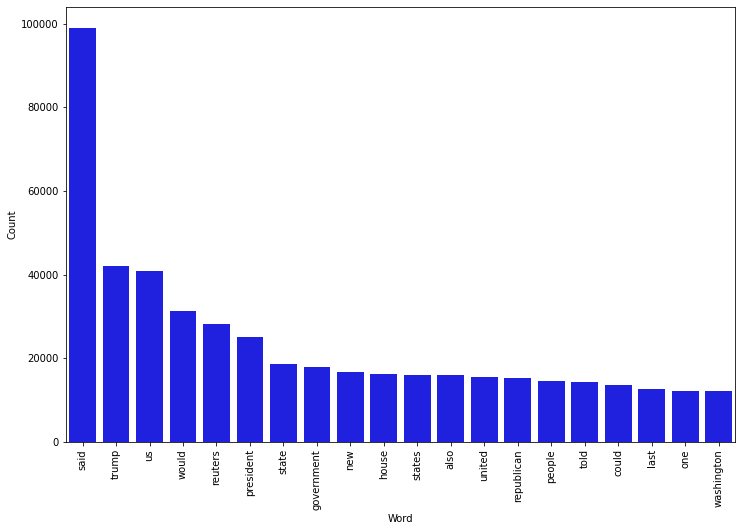

In [68]:
#most frequent words in real news
counter(data[data["target"]=="true"],"text",20)

In [69]:
# function to plot the confusion matrix
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks,classes)
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j],horizontalalignment="center",color="white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


SPLIT DATA

In [70]:
# split the data
x_train,x_test,y_train,y_test = train_test_split(data['text'],data.target, test_size=0.2,random_state=42)


In [72]:
x_train.head()

36335    nigelfarage tells cpac2017 crowd favourite par...
12384    al rawdah egypt reuters people wounded attack ...
24419    albab syriabeirutankara reuters children retur...
24740    21st century wire says week historic internati...
27039    fumbling nancy pelosi tried defend former nfl ...
Name: text, dtype: object

In [74]:
y_train.head()

36335    fake
12384    true
24419    true
24740    fake
27039    fake
Name: target, dtype: object

DECISION TREE CLASSIFIER

In [77]:
from sklearn.tree import DecisionTreeClassifier

# vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',max_depth = 20,splitter='best',random_state=42))])
# Fitting the model
model=pipe.fit(x_train,y_train)

#Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test,prediction)*100,2)))

accuracy: 99.54%


Confusion matrix, without normalization


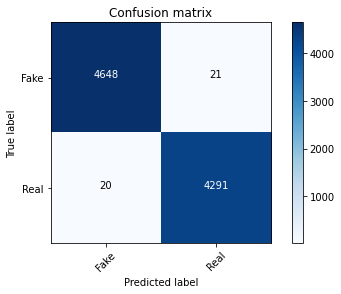

In [76]:
cm=metrics.confusion_matrix(y_test,prediction)
plot_confusion_matrix(cm,classes=['Fake','Real'])